# Create a Neurodata Without Borders File for the Wild and Mutant drosophila

In [1]:
import nwb
from nwb import nwb_file
from nwb import nwb_utils as utils

import neuroarch_nlp

import h5py
import scipy.io as sio



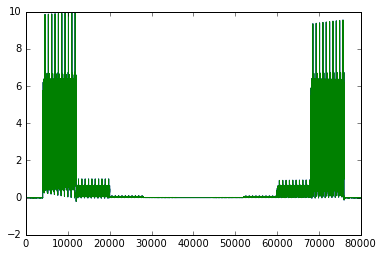

In [2]:
# Load the two data files

mutant_data = sio.loadmat('MutantBG6Data.mat')
wild_data = sio.loadmat('MutantBG6Data.mat')

# Plot an example trace
plt.plot(wild_data['recorded_input']); 
plt.plot(mutant_data['recorded_input']); 
plt.show()

In [3]:
# Create Basic descriptor

settings = {}
settings["file_name"] = "../data/photoreceptor_data.nwb"
settings["identifier"] = utils.create_identifier("BG6")
settings["mode"] = "w"
settings["start_time"] = "2011-01-01T00:00:00.604121Z"
settings["description"] = "A test file using the drosophila photoreceptor data for wild type and histamine defficient flys."
# specify an extension (Could be more than one).
f = nwb_file.open(**settings)

f.set_dataset("lab", "Coca Lab")
f.set_dataset("experiment_description", "Photoreceptor strimulation with and without histamine transmission")
f.set_dataset("experimenter", "Uwe")
f.set_dataset("institution", "The University of Sheffield")
f.set_dataset("session_id", "0")


In [4]:
# Sample recorded at a rate of 400 samples a second.

freq = 1/400.0
times = np.arange(0,freq*len(wild_data['recorded_input']),freq)

# Store the recorded input in the stimulus/presentation directory


ts = f.make_group("<TimeSeries>", "recorded_input",
   path="/stimulus/presentation", attrs= {"source": "..."})

ts.set_dataset("data", mutant_data['recorded_input'],
   attrs={"unit": "unit used"}, compress=True )
ts.set_dataset("timestamps", times, compress=True)
ts.set_dataset("num_samples", len(times))




In [5]:
# Add the wild type data

ts = f.make_group("<TimeSeries>", "wild_output",
   path="/acquisition/timeseries", attrs= {"source": "unknown"})

ts.set_dataset("data", wild_data['recorded_output'],
   attrs={"unit": "s"}, compress=True )

ts.set_dataset("timestamps", times, compress=True)
ts.set_dataset("num_samples", len(times))





In [6]:
# Add the mutant type data

ts = f.make_group("<TimeSeries>", "mutant_output",
   path="/acquisition/timeseries", attrs= {"source": "unknown"})

ts.set_dataset("data", mutant_data['recorded_output'],
   attrs={"unit": "s"}, compress=True )

ts.set_dataset("timestamps", times, compress=True)
ts.set_dataset("num_samples", len(times))

In [7]:
f.close()


******
Validation messages follow.
** No errors. -- Good
No Miscellaneous errors. -- Good
No groups missing. -- Good
No datasets missing. -- Good
No attributes missing. -- Good
No Incorrect attribute values. -- Good
No groups custom missing attribute neurodata_type=Custom. -- Good
No datasets custom missing attribute neurodata_type=Custom. -- Good
No groups defined in extension, but missing attribute schema_id. -- Good
No datasets defined in extension, but missing attribute schema_id. -- Good
** 6 warnings.
No Miscellaneous warnings. -- Good
No groups custom inside custom missing attribute neurodata_type=Custom. -- Good
No datasets custom inside custom missing attribute neurodata_type=Custom. -- Good
No recommended groups missing. -- Good
No recommended datasets missing. -- Good
6 recommended attributes missing:
  1. /acquisition/timeseries/mutant_output - comments
  2. /acquisition/timeseries/mutant_output - description
  3. /acquisition/timeseries/wild_output - comments
  4. /acquis

{'added': 0, 'errors': 0, 'warnings': 6}

In [9]:
f = h5py.File('../data/photoreceptor_data.nwb')

In [12]:
f['general']

[u'experiment_description',
 u'experimenter',
 u'institution',
 u'lab',
 u'session_id',
 u'specifications']

In [34]:
f['acquisition'].keys()

[u'images', u'timeseries']

In [35]:
f['acquisition']['timeseries']

<HDF5 group "/acquisition/timeseries" (3 members)>

In [36]:
f['acquisition']['timeseries'].keys()

[u'mutant_output', u'recorded_input', u'wild_output']

In [37]:
f['acquisition']['timeseries']['recorded_input']

<HDF5 group "/acquisition/timeseries/recorded_input" (3 members)>

In [38]:
f['acquisition']['timeseries']['recorded_input'].keys()

[u'data', u'num_samples', u'timestamps']

In [49]:
f['acquisition']['timeseries']['recorded_input']['num_samples'][()]

80000

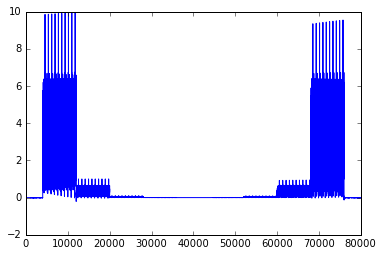

In [40]:
plt.plot(f['acquisition']['timeseries']['recorded_input']['data'][:])
plt.show()

In [41]:
f.close()